In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)


In [ ]:
df=pd.read_csv('D:\\UCHICAGO\\UChicago Courses\\Leadership & Consulting in Data Science\\VerizonCase\\VerizonData.csv')

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.dtypes

year                 int64
month                int64
day                  int64
price              float64
downpmt            float64
monthdue           float64
payment_left       float64
monthly_payment    float64
pmttype              int64
credit_score         int64
age                  int64
gender               int64
default              int64
dtype: object

In [ ]:
df['date']=pd.to_datetime(df.apply(lambda x: str(int(x[0]))+'-'+str(int(x[1]))+'-'+str(int(x[2])),axis=1))

C:\Users\afiniti\AppData\Local\Temp\ipykernel_1576\1626082133.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['date']=pd.to_datetime(df.apply(lambda x: str(int(x[0]))+'-'+str(int(x[1]))+'-'+str(int(x[2])),axis=1))


In [ ]:
df['default_int']=df['default']
df['default']=df['default'].astype('str')

In [ ]:
df.head()

year  month  day    price  downpmt  monthdue  payment_left  \
0  2020      1   12  2178.85   250.00       6.0       1928.85   
1  2020      6   15  1543.65  1543.65       6.0          0.00   
2  2020      4   19  1107.67   125.00       5.0        982.67   
3  2020      3   17   950.44   237.61       9.0        712.83   
4  2020      8   21  1436.00   250.00       9.0       1186.00   

   monthly_payment  pmttype  credit_score  age  gender default       date  \
0       321.475000        4             1    0       2       0 2020-01-12   
1         0.000000        1             0    0       2       0 2020-06-15   
2       196.534000        1             0    0       2       0 2020-04-19   
3        79.203333        5             0    0       1       0 2020-03-17   
4       131.777778        3             0    0       2       0 2020-08-21   

   default_int  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
df['date'].max()

Timestamp('2021-12-25 00:00:00')

In [ ]:
df['date'].min()

Timestamp('2020-01-01 00:00:00')

In [ ]:
df['default'].value_counts(normalize=True)

default
0    0.884951
1    0.115049
Name: proportion, dtype: float64

In [ ]:
df.shape

(24833, 15)

In [ ]:
df['credit_score'].value_counts(normalize=True)*100

credit_score
0    39.914630
1    23.255346
6     9.914227
3     9.604156
4     5.971892
5     4.530262
7     3.189305
2     2.480570
8     1.139613
Name: proportion, dtype: float64

In [ ]:
df['gender'].value_counts()

gender
1    12464
2    12369
Name: count, dtype: int64

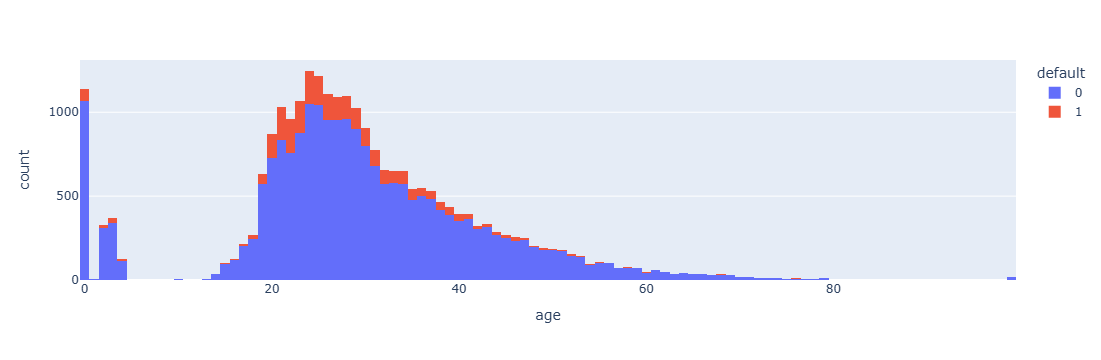

In [ ]:
px.histogram(df,x='age',color='default')

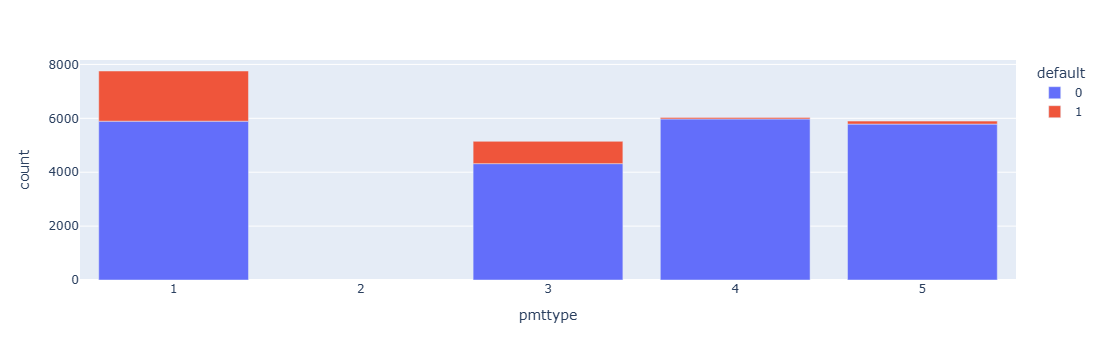

In [ ]:
temp1=df.groupby(['pmttype','default']).size().reset_index(name='count')
px.bar(temp1,x='pmttype',y='count',color='default')

In [ ]:
tempb=df.resample('M',on='date')['default_int'].mean()
#px.line(tempb,x='date',y='default')
tempb[1]

C:\Users\afiniti\AppData\Local\Temp\ipykernel_1576\2579130836.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\afiniti\AppData\Local\Temp\ipykernel_1576\2579130836.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.12330456226880394

In [ ]:
df.columns

Index(['year', 'month', 'day', 'price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender',
       'default', 'date', 'default_int'],
      dtype='object')

In [ ]:
pmttype_dummy=pd.get_dummies(df['pmttype'],drop_first=True,dtype=int,prefix='pmttype_')
gender_dummy=pd.get_dummies(df['gender'],drop_first=True,dtype=int,prefix='gender_')

## Logistic Regression Base Model

In [ ]:
features=df[['price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment',  'credit_score', 'age', ]]

In [ ]:
X=pd.concat([pmttype_dummy,gender_dummy,features],axis=1)

In [ ]:
y=df['default_int']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_train.dtypes

pmttype__3           int32
pmttype__4           int32
pmttype__5           int32
gender__2            int32
price              float64
downpmt            float64
monthdue           float64
payment_left       float64
monthly_payment    float64
credit_score         int64
age                  int64
dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

C:\Users\afiniti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[4257,  154],
       [ 364,  192]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.8957116972015301

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4411
           1       0.55      0.35      0.43       556

    accuracy                           0.90      4967
   macro avg       0.74      0.66      0.68      4967
weighted avg       0.88      0.90      0.88      4967



In [ ]:
roc_auc_score(y_test,y_pred)

0.6552055114013527

## XGBoost model

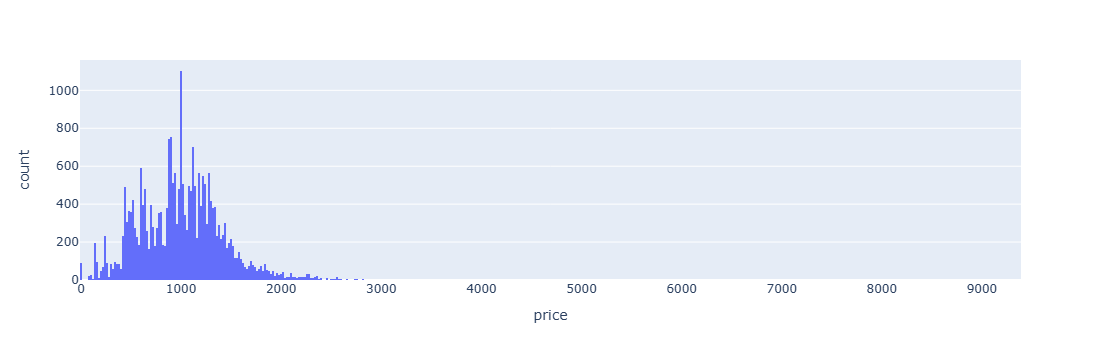

In [ ]:
px.histogram(df,x='price')

In [ ]:
df['price_capped']=df['price']
df.loc[df['price']>3000,'price_capped']=3000


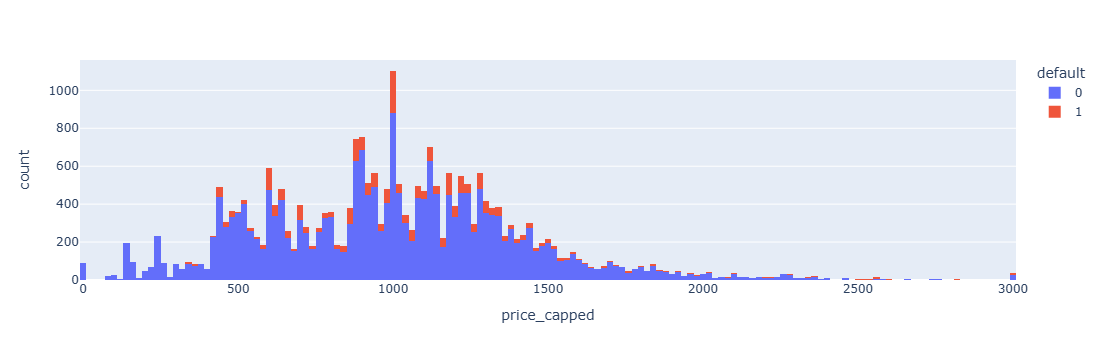

In [ ]:
px.histogram(df,x='price_capped',color='default')

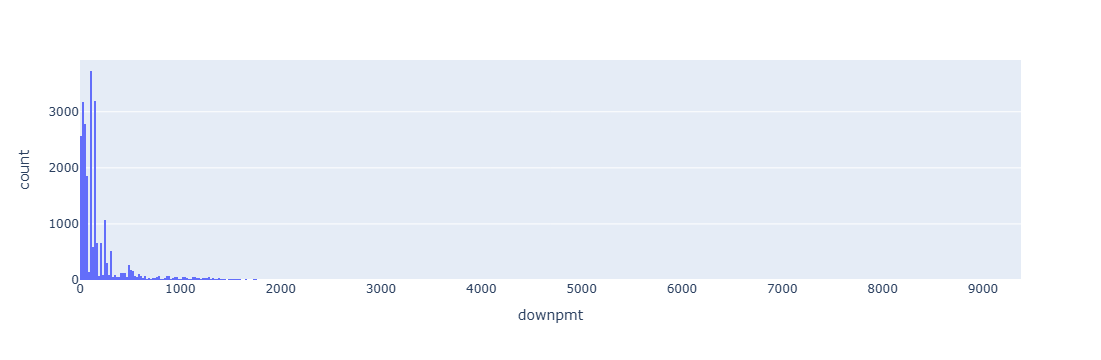

In [ ]:
px.histogram(df,x='downpmt')

In [ ]:
df['downpmt_capped']=df['downpmt']
df.loc[df['downpmt']>2000,'downpmt_capped']=2000

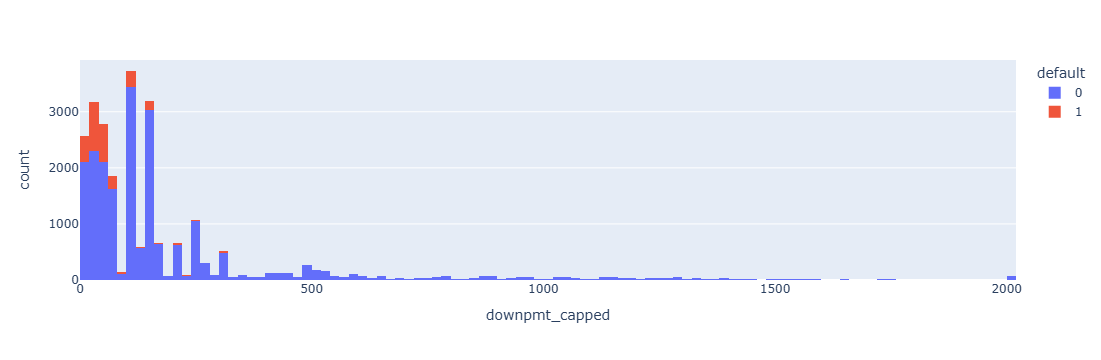

In [ ]:
px.histogram(df,x='downpmt_capped',color='default')

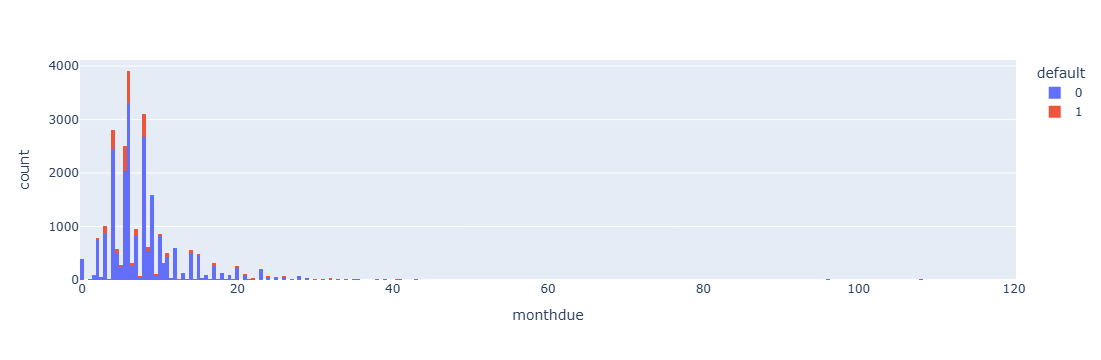

In [ ]:
px.histogram(df,x='monthdue',color='default')

In [ ]:
df['monthdue_capped']=df['monthdue']
df.loc[df['monthdue']>30,'monthdue_capped']=30

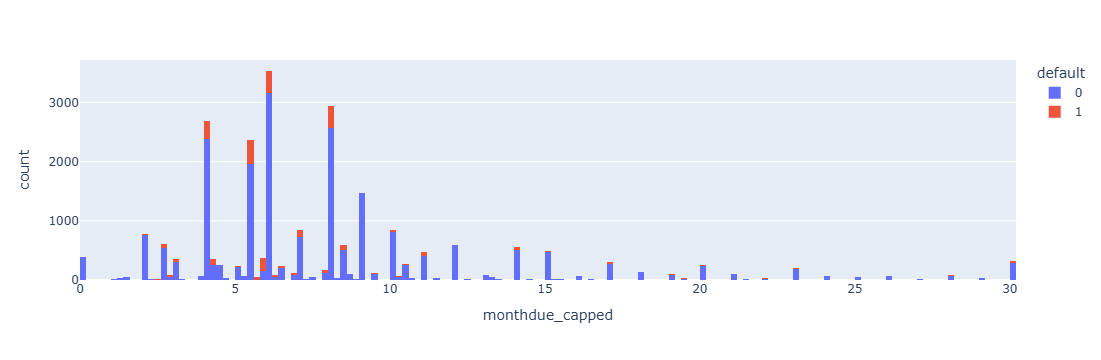

In [ ]:
px.histogram(df,x='monthdue_capped',color='default')

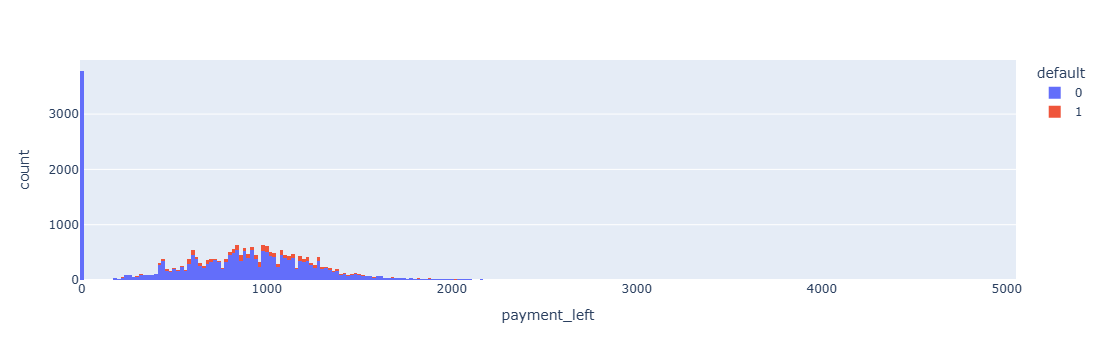

In [ ]:
px.histogram(df,x='payment_left',color='default')

In [ ]:
(df['payment_left']==0).mean()

0.1521362702855072

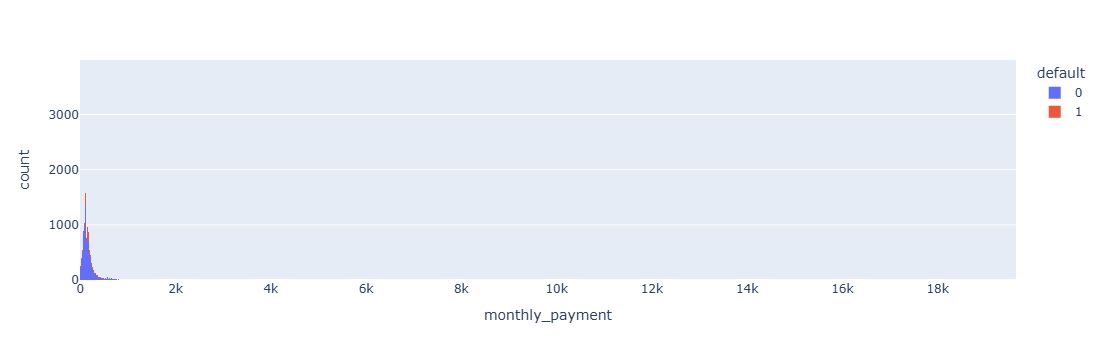

In [ ]:
px.histogram(df,x='monthly_payment',color='default')

In [ ]:
df['monthly_payment_capped']=df['monthly_payment']
df.loc[df['monthly_payment']>800,'monthly_payment_capped']=800

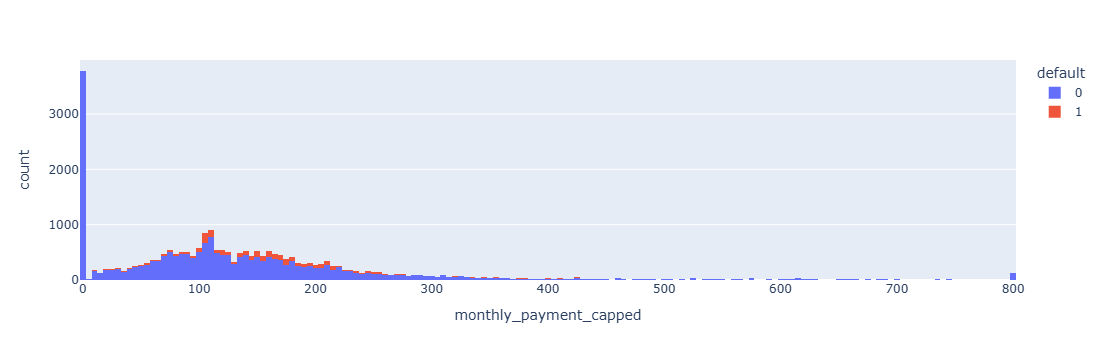

In [ ]:
px.histogram(df,x='monthly_payment_capped',color='default')

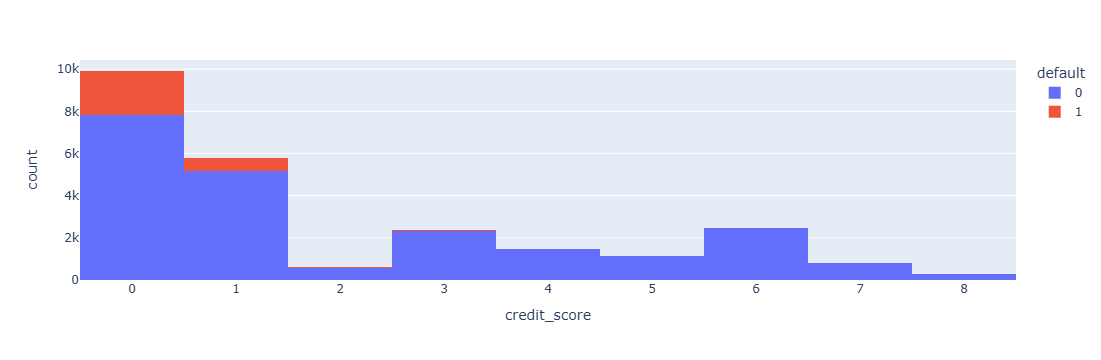

In [ ]:
px.histogram(df,x='credit_score',color='default')

In [ ]:
df.columns

Index(['year', 'month', 'day', 'price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender',
       'default', 'date', 'default_int', 'price_capped', 'downpmt_capped',
       'monthdue_capped', 'monthly_payment_capped'],
      dtype='object')

In [ ]:
#df['Date'].max()
df['Month']=df['date'].dt.month
df['Quarter']=df['date'].dt.quarter
df['dayofweek']=df['date'].dt.dayofweek
df['dayofmonth']=df['date'].dt.day

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['dayname']=df['dayofweek'].map(day_names)

df['is_weekend']=1
df.loc[df['dayofweek'].isin([0,1,2,3,4]),'is_weekend']=0

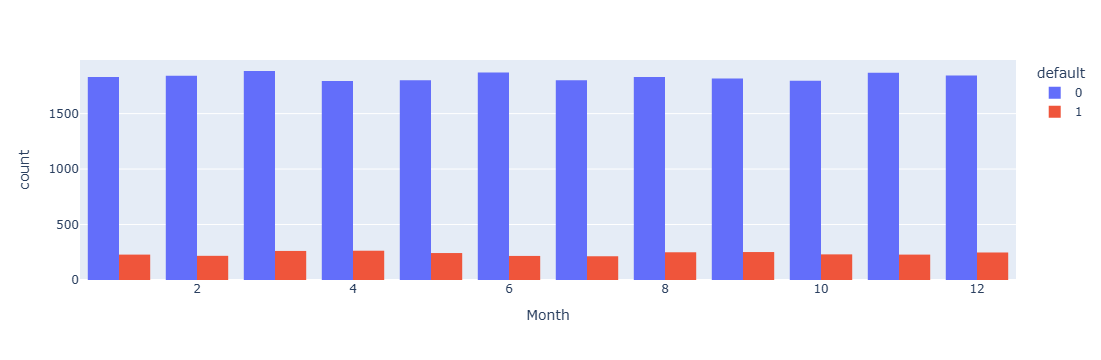

In [ ]:
px.histogram(df,x='Month',color='default',barmode='group')


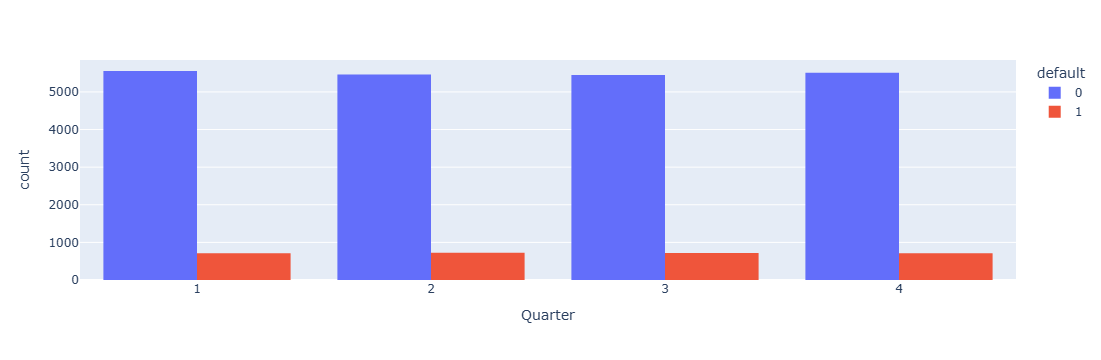

In [ ]:
px.histogram(df,x='Quarter',color='default',barmode='group')

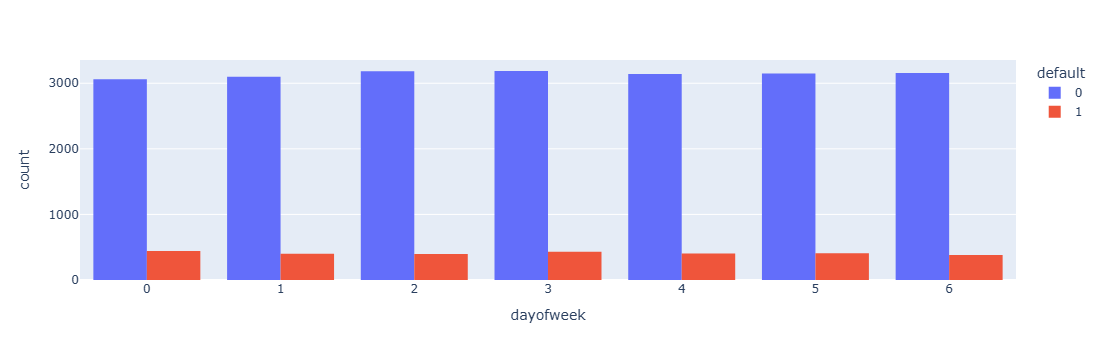

In [ ]:
px.histogram(df,x='dayofweek',color='default',barmode='group')

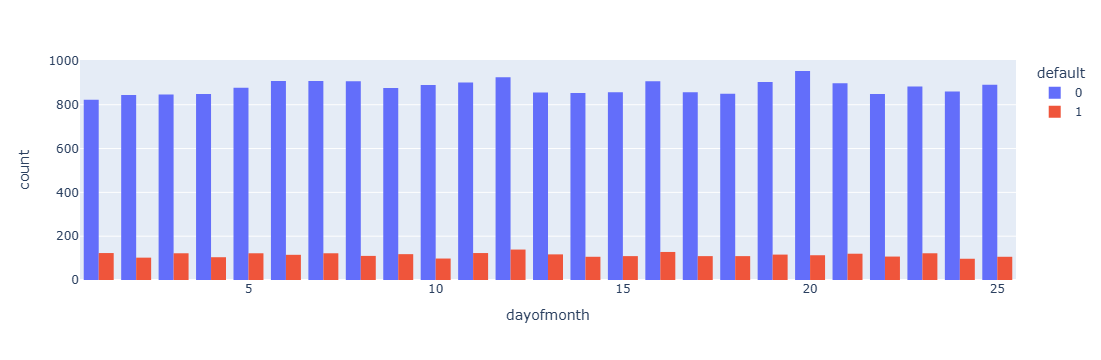

In [ ]:
px.histogram(df,x='dayofmonth',color='default',barmode='group')

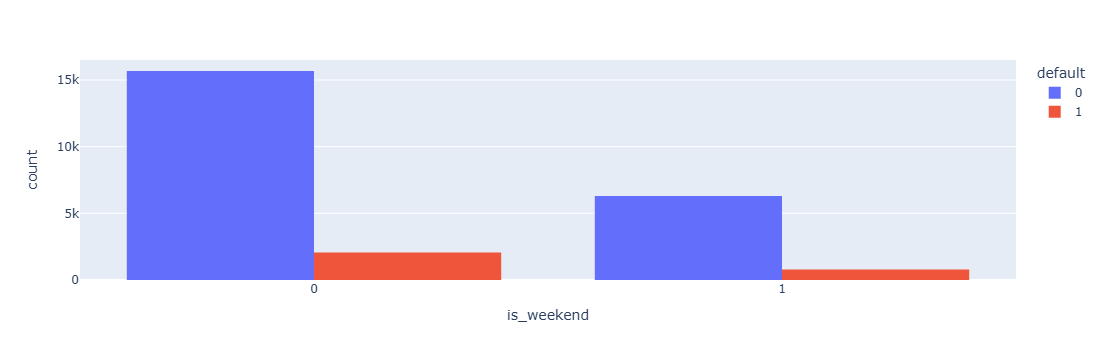

In [ ]:
px.histogram(df,x='is_weekend',color='default',barmode='group')

In [ ]:
temp2=df.groupby(['is_weekend','default']).size()
totalcounts=temp2.groupby(level='is_weekend').transform('sum')

In [ ]:
temp2/totalcounts

is_weekend  default
0           0          0.883384
            1          0.116616
1           0          0.888873
            1          0.111127
dtype: float64

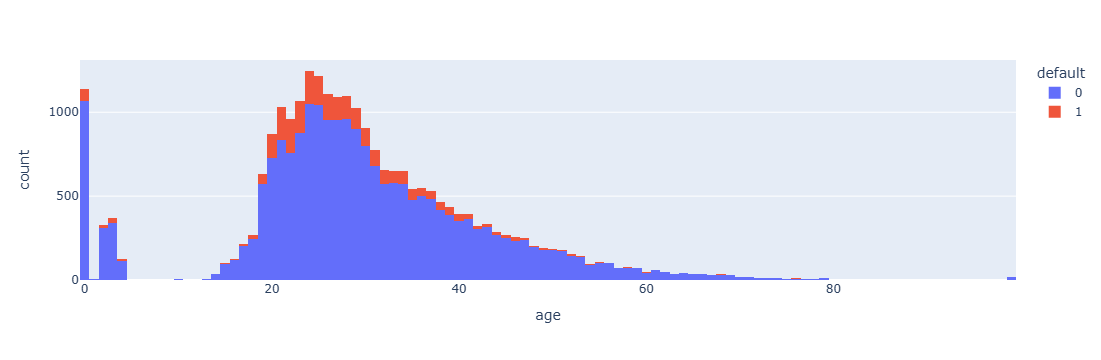

In [ ]:
px.histogram(df,x='age',color='default')

In [ ]:
df[df['age']==0]

year  month  day    price  downpmt  monthdue  payment_left  \
0     2020      1   12  2178.85   250.00      6.00       1928.85   
1     2020      6   15  1543.65  1543.65      6.00          0.00   
2     2020      4   19  1107.67   125.00      5.00        982.67   
3     2020      3   17   950.44   237.61      9.00        712.83   
4     2020      8   21  1436.00   250.00      9.00       1186.00   
...    ...    ...  ...      ...      ...       ...           ...   
1133  2020      2   18  1620.93   125.00      2.00       1495.93   
1134  2020      4    7  1060.80   175.00      2.18        885.80   
1135  2020      2   20   707.16   100.00      4.00        607.16   
1136  2020      8    2  1722.00   125.00      2.00       1597.00   
1137  2020      4   25  1048.00   275.00      8.75        773.00   

      monthly_payment  pmttype  credit_score  age  gender default       date  \
0          321.475000        4             1    0       2       0 2020-01-12   
1            0.000000        1             0    0       2       0 2020-06-15   
2          196.534000        1             0    0       2       0 2020-04-19   
3           79.203333        5             0    0       1       0 2020-03-17   
4          131.777778        3             0    0       2       0 2020-08-21   
...               ...      ...           ...  ...     ...     ...        ...   
1133       747.965000        5             0    0       2       0 2020-02-18   
1134       406.330275        5             0    0       1       0 2020-04-07   
1135       151.790000        5             3    0       2       0 2020-02-20   
1136       798.500000        3             1    0       2       0 2020-08-02   
1137        88.342857        4             1    0       2       0 2020-04-25   

      default_int  price_capped  downpmt_capped  monthdue_capped  \
0               0       2178.85          250.00             6.00   
1               0       1543.65         1543.65             6.00   
2               0       1107.67          125.00             5.00   
3               0        950.44          237.61             9.00   
4               0       1436.00          250.00             9.00   
...           ...           ...             ...              ...   
1133            0       1620.93          125.00             2.00   
1134            0       1060.80          175.00             2.18   
1135            0        707.16          100.00             4.00   
1136            0       1722.00          125.00             2.00   
1137            0       1048.00          275.00             8.75   

      monthly_payment_capped  Month  Quarter  dayofweek  dayofmonth   dayname  \
0                 321.475000      1        1          6          12    Sunday   
1                   0.000000      6        2          0          15    Monday   
2                 196.534000      4        2          6          19    Sunday   
3                  79.203333      3        1          1          17   Tuesday   
4                 131.777778      8        3          4          21    Friday   
...                      ...    ...      ...        ...         ...       ...   
1133              747.965000      2        1          1          18   Tuesday   
1134              406.330275      4        2          1           7   Tuesday   
1135              151.790000      2        1          3          20  Thursday   
1136              798.500000      8        3          6           2    Sunday   
1137               88.342857      4        2          5          25  Saturday   

      is_weekend  
0              1  
1              0  
2              1  
3              0  
4              0  
...          ...  
1133           0  
1134           0  
1135           0  
1136           1  
1137           1  

[1138 rows x 25 columns]

In [ ]:
df.columns

Index(['year', 'month', 'day', 'price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender',
       'default', 'date', 'default_int', 'price_capped', 'downpmt_capped',
       'monthdue_capped', 'monthly_payment_capped', 'Month', 'Quarter',
       'dayofweek', 'dayofmonth', 'dayname', 'is_weekend'],
      dtype='object')

In [ ]:
X=pd.concat([df[['price_capped', 'downpmt_capped','monthdue_capped', 'monthly_payment_capped','payment_left','credit_score','age']],pmttype_dummy,gender_dummy],axis=1)

In [ ]:
X.head()

price_capped  downpmt_capped  monthdue_capped  monthly_payment_capped  \
0       2178.85          250.00              6.0              321.475000   
1       1543.65         1543.65              6.0                0.000000   
2       1107.67          125.00              5.0              196.534000   
3        950.44          237.61              9.0               79.203333   
4       1436.00          250.00              9.0              131.777778   

   payment_left  credit_score  age  pmttype__3  pmttype__4  pmttype__5  \
0       1928.85             1    0           0           1           0   
1          0.00             0    0           0           0           0   
2        982.67             0    0           0           0           0   
3        712.83             0    0           0           0           1   
4       1186.00             0    0           1           0           0   

   gender__2  
0          1  
1          1  
2          1  
3          0  
4          1

In [ ]:
y=df['default_int']
y

0        0
1        0
2        0
3        0
4        0
        ..
24828    0
24829    0
24830    0
24831    0
24832    0
Name: default_int, Length: 24833, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [ ]:
scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])
print(scale_pos_weight)

7.690288713910761


In [ ]:
model=xgb.XGBClassifier(objective='binary:logistic',
              scale_pos_weight=scale_pos_weight,
              eval_metric='auc',
              use_label_encoder=False)

In [ ]:
model.fit(X_train,y_train)

C:\Users\afiniti\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred_proba=model.predict_proba(X_test)[:,1]

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3924,  472],
       [ 111,  460]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.882625327159251

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4396
           1       0.49      0.81      0.61       571

    accuracy                           0.88      4967
   macro avg       0.73      0.85      0.77      4967
weighted avg       0.92      0.88      0.89      4967



In [ ]:
roc_auc_score(y_test,y_pred)

0.8491169332413322

##  Weights and lift Calculation

In [ ]:
#cm1=np.array([[4228,  168],
#       [ 249,  322]])
cm1=np.array([[3924,  472],
       [ 111,  460]])

In [ ]:
cmlg=np.array([[4257,  154],
       [ 364,  192]])

In [ ]:
dif=cm1-cmlg
print(dif)

[[-333  318]
 [-253  268]]


In [ ]:
w=np.array([[250,  -250],
       [ -1250,  1000]])

In [ ]:
np.sum(dif*w)

421500

In [ ]:
df.shape

(24833, 25)

In [ ]:
#Dollar lift per customer
#263000/24833
np.sum(dif*w)/df.shape[0]

16.97338219304957

In [ ]:
#Dollar lift per million customer
(np.sum(dif*w)/df.shape[0])*1000000

16973382.19304957

In [ ]:
import os

In [ ]:
os.getcwd()

'C:\\Users\\afiniti'

In [ ]:
os.chdir('D:\\UCHICAGO\\UChicago Courses\\Leadership & Consulting in Data Science\\VerizonCase\\')

In [ ]:
X.to_csv('X_df.csv')

In [ ]:
y.to_csv('y_df.csv')